count    267.000000
mean      12.236929
std       10.803283
min        0.500000
25%        4.845000
50%        9.650000
75%       16.755000
max       75.850000
Name:  Estimated Unemployment Rate (%), dtype: float64
Missing values:
 Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
Date                                        0
dtype: int64


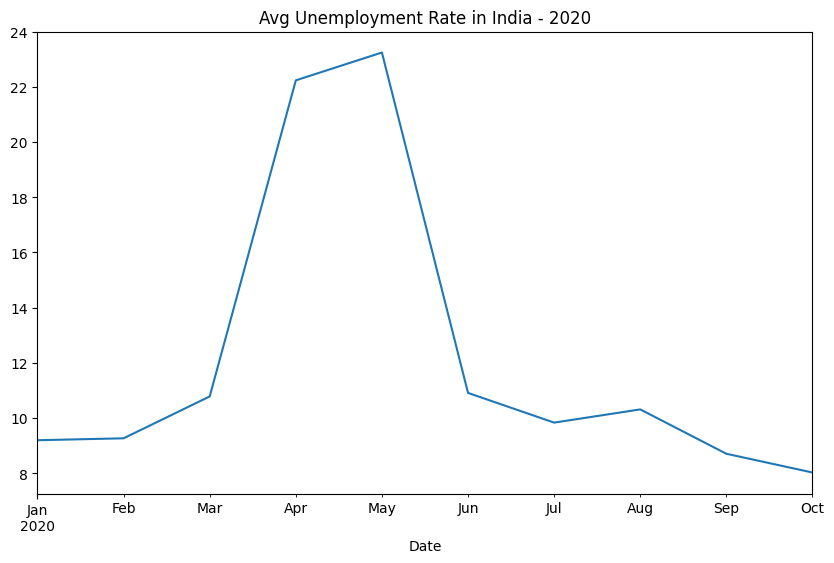

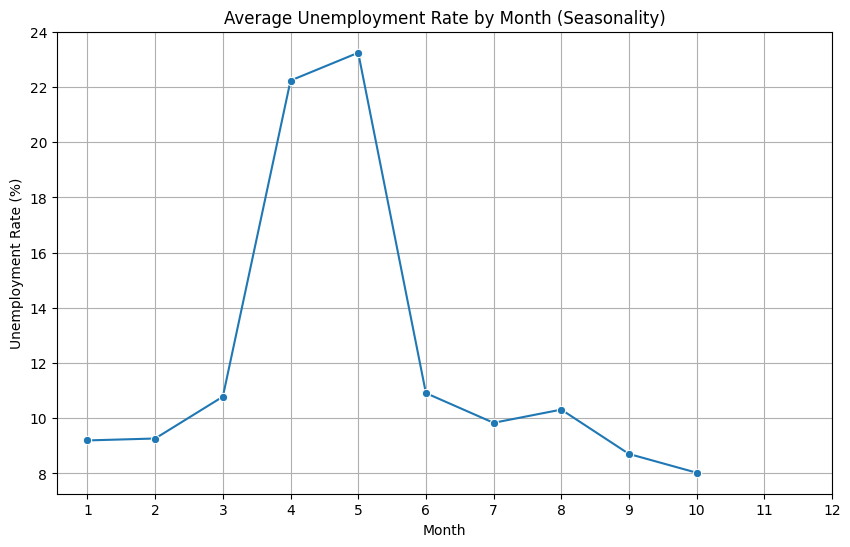

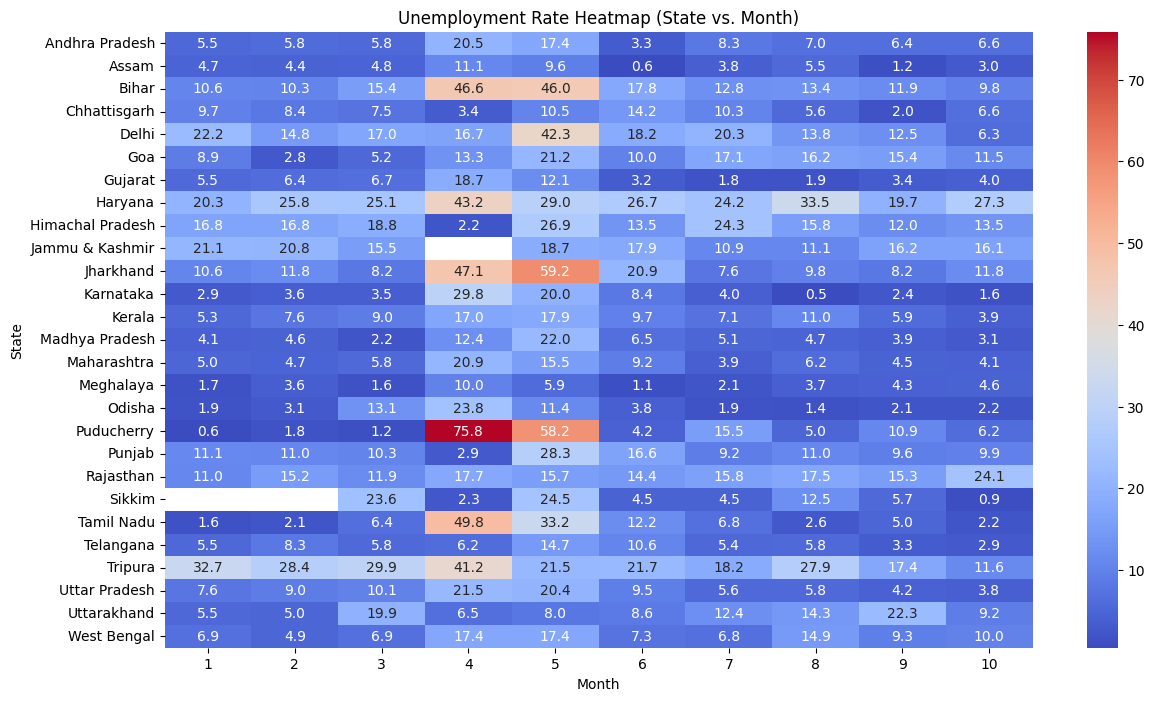

Pre-lockdown avg: 9.231346153846154
Lockdown avg: 18.710875
Region
Puducherry    43.910000
Tamil Nadu    27.966667
Jharkhand     26.953333
Bihar         25.560000
Karnataka     14.521667
Name:  Estimated Unemployment Rate (%), dtype: float64


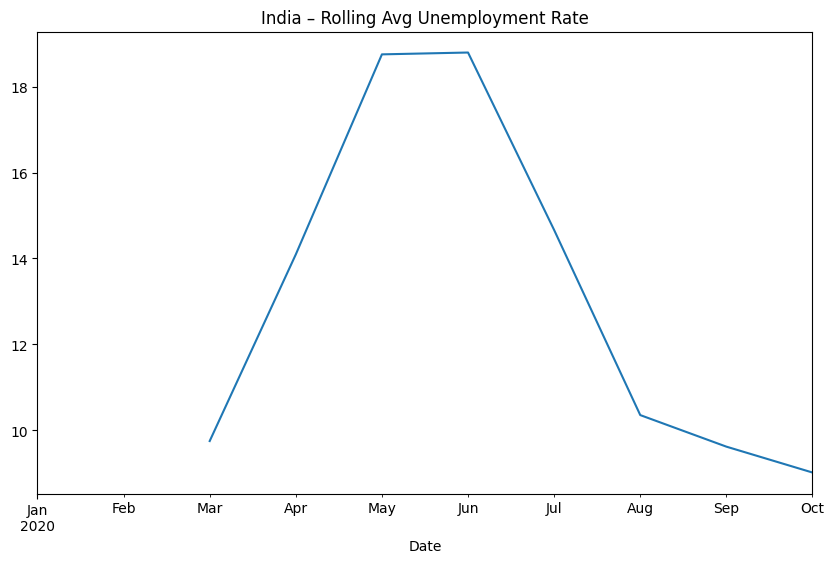

Target seasonal job losses.
Economic shocks hit urban centers fast (e.g., Delhi, Maharashtra).
Address regional disparities via state-specific policies.
Prepare for future economic shocks with adaptive policies.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load & clean
df = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
df['Date'] = pd.to_datetime(df[' Date'], dayfirst=True, errors='coerce')
df = df.dropna(subset=[' Estimated Unemployment Rate (%)'])
df.sort_values(['Region','Date'], inplace=True)

# 2. Summaries
print(df[' Estimated Unemployment Rate (%)'].describe())
print("Missing values:\n", df.isnull().sum())

# 3. National trend
national = df.groupby('Date')[' Estimated Unemployment Rate (%)'].mean()
plt.figure(figsize=(10,6))
national.plot(title='Avg Unemployment Rate in India - 2020')
plt.show()

# Monthly trend
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby('Month')[' Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o')
plt.title('Average Unemployment Rate by Month (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

# Region wise pattern
pivot = df.pivot_table(values=' Estimated Unemployment Rate (%)',
                       index='Region', columns='Month', aggfunc='mean')

plt.figure(figsize=(14,8))
sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Unemployment Rate Heatmap (State vs. Month)')
plt.ylabel('State')
plt.xlabel('Month')
plt.show()



# 4. Phase comparison
pre = df[df['Date'].dt.month <= 2]
lock = df[df['Date'].dt.month.isin([3,4,5])]
print("Pre-lockdown avg:", pre[' Estimated Unemployment Rate (%)'].mean())
print("Lockdown avg:", lock[' Estimated Unemployment Rate (%)'].mean())

# 5. State peaks
state_change = lock.groupby('Region')[' Estimated Unemployment Rate (%)'].mean() - pre.groupby('Region')[' Estimated Unemployment Rate (%)'].mean()
print(state_change.sort_values(ascending=False).head())

# 6. Rolling avg plot example (India)
df['Unemp_Rolling'] = df.groupby('Region')[' Estimated Unemployment Rate (%)'].transform(lambda x: x.rolling(3,min_periods=1).mean())
india = df.groupby('Date')[' Estimated Unemployment Rate (%)'].mean().rolling(3).mean()
plt.figure(figsize=(10,6))
india.plot(title='India – Rolling Avg Unemployment Rate')
plt.show()

# 7. Insights
print("Target seasonal job losses.")
print("Economic shocks hit urban centers fast (e.g., Delhi, Maharashtra).")
print("Address regional disparities via state-specific policies.")
print("Prepare for future economic shocks with adaptive policies.")